##Features Exploration

This dataset consists of 11 features and a target variable. The dataset consists of 1191 patients.
Here is a detailed description of all the features:

1. Age: Age of patient in years (Numerical)
2. Sex: Gender of patient [Male - 1, Female - 0] 
3. Chest Pain Type: Type of chest pain experienced by patient - [1 typical, 2 typical angina, 3 non- anginal pain, 4 asymptomatic]
4. resting bp s: Level of blood pressure at resting mode in mm/HG (Numerical)
5. cholestrol: Serum cholestrol in mg/dl (Numerical)
6. fasting blood sugar: Blood sugar levels on fasting - [> 120 mg/dl is 1, less or equal than 120 mg/dl is 0.] 
7. resting ecg: Result of electrocardiogram while at rest - [0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy]
8. max heart rate: The maximum heart rate achieved (Numerical)
9. exercise angina: Angina that was induced by exercise - [0 is NO,  1 is Yes]
10. oldpeak: Exercise induced ST-depression in comparison with the state of rest (Numerical)
11. ST slope: ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)

Target variable
12. target: 1 - patient at heart disease risk, 0 - patient is not at a risk of suffering from a heart disease.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Scikit-Learn Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



from xgboost import XGBClassifier

# Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

     |████████████████████████████████| 65.8MB 101kB/s 


In [ ]:
preferred_colours = ['salmon',
                    'lightblue',
                    'yellow']

sns.set_palette(preferred_colours)

In [ ]:
df = pd.read_csv("drive/My Drive/heart_failure/heart_dataset.csv", sep=",")
df.shape

(1190, 12)

In [ ]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
# Are there any missing values?
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

### We do not have any missing values
let's continue with our data exploration

In [ ]:
df.mean()

age                     53.720168
sex                      0.763866
chest pain type          3.232773
resting bp s           132.153782
cholesterol            210.363866
fasting blood sugar      0.213445
resting ecg              0.698319
max heart rate         139.732773
exercise angina          0.387395
oldpeak                  0.922773
ST slope                 1.624370
target                   0.528571
dtype: float64

We have inbalanced data in terms of sex. 909 men vs 281 female.

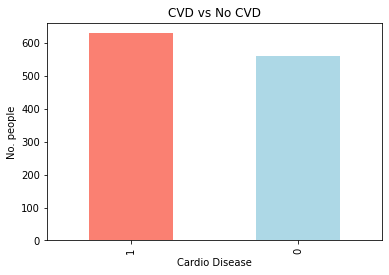

In [ ]:
#See how many people have cardio vascular disease 
df["target"].value_counts().plot(xlabel="Cardio Disease", ylabel="No. people",kind="bar",color=["salmon","lightblue"],title="CVD vs No CVD");

The dataset is pretty even. Almost half have cvd and other half do not.


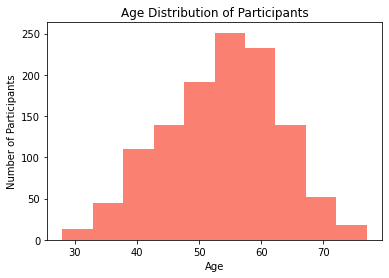

In [ ]:
fig, ax = plt.subplots()
ax.hist(df.age);
ax.set(title="Age Distribution of Participants",
      xlabel="Age",ylabel="Number of Participants");

In [ ]:
# Compare CVD with sex column.
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,211,350
1,70,559


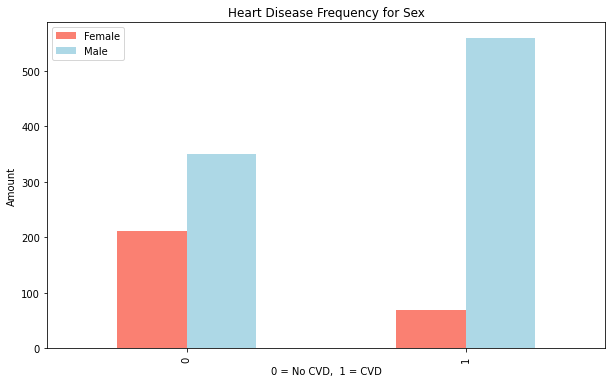

In [ ]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No CVD,  1 = CVD")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
# plt.xticks(rotation=0);

(12.5, -0.5)

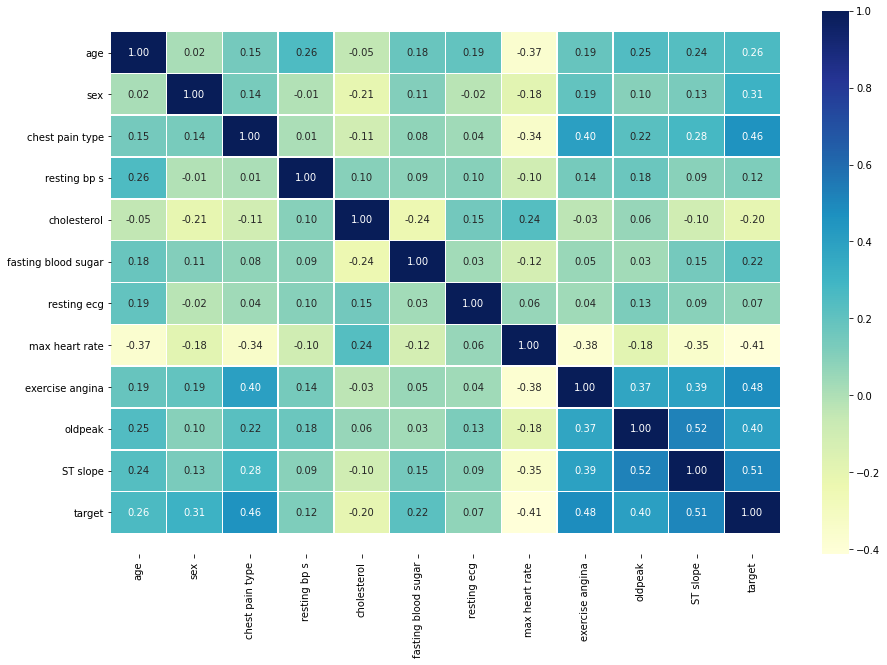

In [ ]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df.corr(),
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Training Experiments

###Random Forest

In [ ]:
#Setup random seed
np.random.seed(28)

#Make the data
X = df.drop("target",axis=1)
y = df["target"]

#We have to split the data between train and test group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Inititalize Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

#Fit the model to the data
clf.fit(X_train, y_train)

#Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.9159663865546218

In [ ]:
#Cross Validated score
cv_score = cross_val_score(clf,X,y, cv=5)

np.mean(cv_score)

0.926890756302521

In [ ]:
#Make Predictions for the model
y_preds = clf.predict(X_test)

In [ ]:
#Evaluate the regression model
print("Evaluatiing different criteria for our model")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Evaluatiing different criteria for our model
Accuracy: 91.60%
Precision: 0.9225352112676056
Recall: 0.9357142857142857
F1: 0.9290780141843971


## Hyperparameter tuning using RandomizedSearchCV

In [ ]:
grid = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}


np.random.seed(28)

# Split into X & y
X = df.drop("target", axis=1)
y = df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(estimator=clf,param_distributions=grid,n_iter=5, cv=5, verbose=2)

#Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   2.2s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   2.2s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   2.1s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   2.1s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   2.2s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=1200, min_samples_split=4

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.1min finished


In [ ]:
#Lets see the best hyperparameters
rs_clf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1200}

In [ ]:
def evaluate_preds(y_test,y_preds):
    print("Evaluatiing different criteria for our model")
    print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_preds)}")
    print(f"Recall: {recall_score(y_test, y_preds)}")
    print(f"F1: {f1_score(y_test, y_preds)}")
    return;

In [ ]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Evaluatiing different criteria for our model
Accuracy: 92.02%
Precision: 0.9290780141843972
Recall: 0.9357142857142857
F1: 0.9323843416370108


## Let's try to train different models

In [ ]:
#For confusion matrix
conf_dict = {}


# Create a function to fit and score models
def fit_score_model(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates the machine learning models passed in.
    """
    # Set random seed
    np.random.seed(28)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        #Make predictions.
        y_preds = model.predict(X_test)
        conf_matrix(name=name,y_preds=y_preds, y_test=y_test)
    return model_scores


def conf_matrix(name, y_preds, y_test):
    #Compare predictions with actual labels.
    conf_dict[name] = confusion_matrix(y_test, y_preds)
    

In [ ]:
# Split into X & y
X = df.drop("target", axis=1)
y = df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:

# I created a dictionary and I put different models inside, this will be used to train different models with the same code.
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
         "XGBoost": XGBClassifier(),
         "Decision Tree": DecisionTreeClassifier(),
          "Catboost Classifier":CatBoostClassifier()}

model_scores = fit_score_model(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Learning rate set to 0.010088
0:	learn: 0.6846989	total: 1.31ms	remaining: 1.31s
1:	learn: 0.6763771	total: 2.53ms	remaining: 1.26s
2:	learn: 0.6684341	total: 3.77ms	remaining: 1.25s
3:	learn: 0.6607785	total: 4.89ms	remaining: 1.22s
4:	learn: 0.6529019	total: 6.1ms	remaining: 1.21s
5:	learn: 0.6454174	total: 7.26ms	remaining: 1.2s
6:	learn: 0.6386061	total: 8.44ms	remaining: 1.2s
7:	learn: 0.6319581	total: 9.65ms	remaining: 1.2s
8:	learn: 0.6250095	total: 10.9ms	remaining: 1.2s
9:	learn: 0.6183669	total: 12.1ms	remaining: 1.2s
10:	learn: 0.6130295	total: 13.3ms	remaining: 1.19s
11:	learn: 0.6060867	total: 14.5ms	remaining: 1.19s
12:	learn: 0.6005483	total: 15.5ms	remaining: 1.18s
13:	learn: 0.5944637	total: 16.7ms	remaining: 1.18s
14:	learn: 0.5890632	total: 17.9ms	remaining: 1.17s
15:	learn: 0.5821954	total: 19.1ms	remaining: 1.18s
16:	learn: 0.5772359	total: 20.3ms	remaining: 1.18s
17:	learn: 0.5720442	total: 21.5ms	remaining: 1.18s
18:	learn: 0.5666283	total: 22.7ms	remaining: 1.17

{'Catboost Classifier': 0.9159663865546218,
 'Decision Tree': 0.8571428571428571,
 'KNN': 0.7142857142857143,
 'Logistic Regression': 0.8319327731092437,
 'XGBoost': 0.8739495798319328}

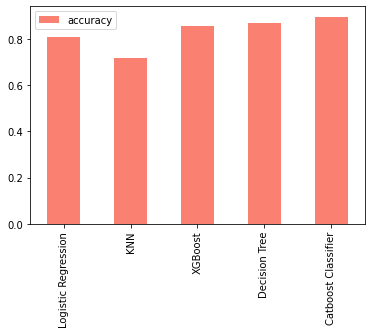

In [ ]:
diff_scores = pd.DataFrame(model_scores, index=["accuracy"])
diff_scores.T.plot.bar();

In [ ]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt 
from sklearn.model_selection import GridSearchCV 

np.random.seed(28)
#Make the data
X = df.drop("target",axis=1)
y = df["target"]

#We have to split the data between train and test group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Inititalize Random Forest Classifier
cat = CatBoostClassifier()

parameters = {'depth': [6,8,10],
              'learning_rate' : [0.01, 0.03,0.05, 0.1,0.15],
              'iterations'    : [10, 30, 40, 50, 100, 150]}

grid = GridSearchCV(estimator=cat, param_grid = parameters, 
                               cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

0:	learn: 0.6507201	total: 2.66ms	remaining: 396ms
1:	learn: 0.6144489	total: 3.2ms	remaining: 237ms
2:	learn: 0.5889961	total: 15ms	remaining: 733ms
3:	learn: 0.5673535	total: 20.5ms	remaining: 750ms
4:	learn: 0.5525883	total: 25.9ms	remaining: 752ms
5:	learn: 0.5302462	total: 26.7ms	remaining: 640ms
6:	learn: 0.5143687	total: 31.9ms	remaining: 652ms
7:	learn: 0.5016334	total: 37.1ms	remaining: 659ms
8:	learn: 0.4871525	total: 43.2ms	remaining: 677ms
9:	learn: 0.4755056	total: 48.8ms	remaining: 683ms
10:	learn: 0.4649697	total: 54.8ms	remaining: 693ms
11:	learn: 0.4524934	total: 60.8ms	remaining: 699ms
12:	learn: 0.4437377	total: 66.9ms	remaining: 705ms
13:	learn: 0.4346346	total: 72.6ms	remaining: 705ms
14:	learn: 0.4241053	total: 78.4ms	remaining: 706ms
15:	learn: 0.4157782	total: 83.9ms	remaining: 703ms
16:	learn: 0.4068590	total: 89.5ms	remaining: 700ms
17:	learn: 0.3987671	total: 94.9ms	remaining: 696ms
18:	learn: 0.3916298	total: 100ms	remaining: 693ms
19:	learn: 0.3828430	total